# Clase 4

## Introducción a Machine Learning

Brevemente podemos definir a _Machine Learning_ como la ciencia de hacer que las computadoras puedan _aprender de los datos_ sin ser explícitamente programadas. Piensen en un sistema de filtrado de spam que aprende a clasificar emails a partir de los datos que recibe de los usuarios.

Se suele clasificar los distintos tipos de machine learning en las siguientes categorías:

- **Supervisado** (supervised learning)
    Cuando tenemos datos con sus correspondientes etiquetas (labels). El objetivo es entrenar un modelo que pueda predecir las etiquetas a partir de datos nuevos. Por ejemplo, siguiendo con el sistema de filtro de spam, entrenamos nuestro modelo con ejemplos de mail acompañados de su clase (_spam_ o _ham_) para que aprenda a clasificar nuevos mails.
    
- **No supervisado** (unsupervised learning)
    En este caso, los datos no estan etiquetados, y el sistema de machine learning tiene que detectar patrones, clasificar o sumarizar los datos. Dentro de esta categoría tenemos los siguientes subtipos:
    - Clustering
    - Detección de anomalías
    - Reducción de dimensiones
    - Aprendizaje de reglas de asociación
    
- **Semi supervisado** (semisupervised learning)
   Tenemos sólo una parte de los datos con sus correspondientes etiquetas. En general, estos métodos combinan algoritmos de aprendizaje supervisado y no supervisado.
   
- **Aprendizaje por refuerzo** (reinforcement learning)
    Este tipo de machine learning es considerablemente distinto de los anteriores. En este caso el sistema de aprendizaje (_agente_) elige y ejecuta acciones que interactuan con un contexto o ambiente y obtiene una "recompensa" (que puede ser negativa). El objetivo del agente es maximizar dicha recompensa.

## Scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/index.html) es la librería más importante de machine learning en Python. Tiene implementaciones de varios algoritmos de clasificación, clustering, reducción de dimensionalidad y regresión.

![](https://scikit-learn.org/stable/_static/ml_map.png)

El workflow típico cuando usamos `sklearn` es:

1. Instanciamos el modelo
2. Lo entrenamos sobre (una parte de) los datos
3. Usamos el modelo entrenado para predecir

### Ejemplo: clasificación del Iris data set

Vamos a explorar los [datos de Iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris), un data set originalmente recopilado por Ronald Fisher en 1936. Contiene datos de 3 especies de Iris, con 50 observaciones para cada especie.

Atributos:
1. Sepal length (longitud del sépalo en cm)
2. Sepal width (ancho del sépalo en cm)
3. Petal length (longitud del pétalo en cm)
4. Petal width (ancho del pétalo en cm)
5. Species (especie):
    - setosa
    - versicolor
    - virginica

Como objetivo, queremos clasificar las plantas según su especie usando los otros atributos.

In [1]:
import pandas as pd
import seaborn as sns

In [8]:
sns.set(rc={'figure.figsize': (12,8)})

In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [4]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Vemos que `species`, una [variable categórica](https://es.wikipedia.org/wiki/Variable_categórica), que `pandas` interpretó como `string`. Lo podemos convertir al tipo `pd.Categorical`

In [39]:
iris['species'] = iris['species'].astype('category')

In [40]:
iris.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

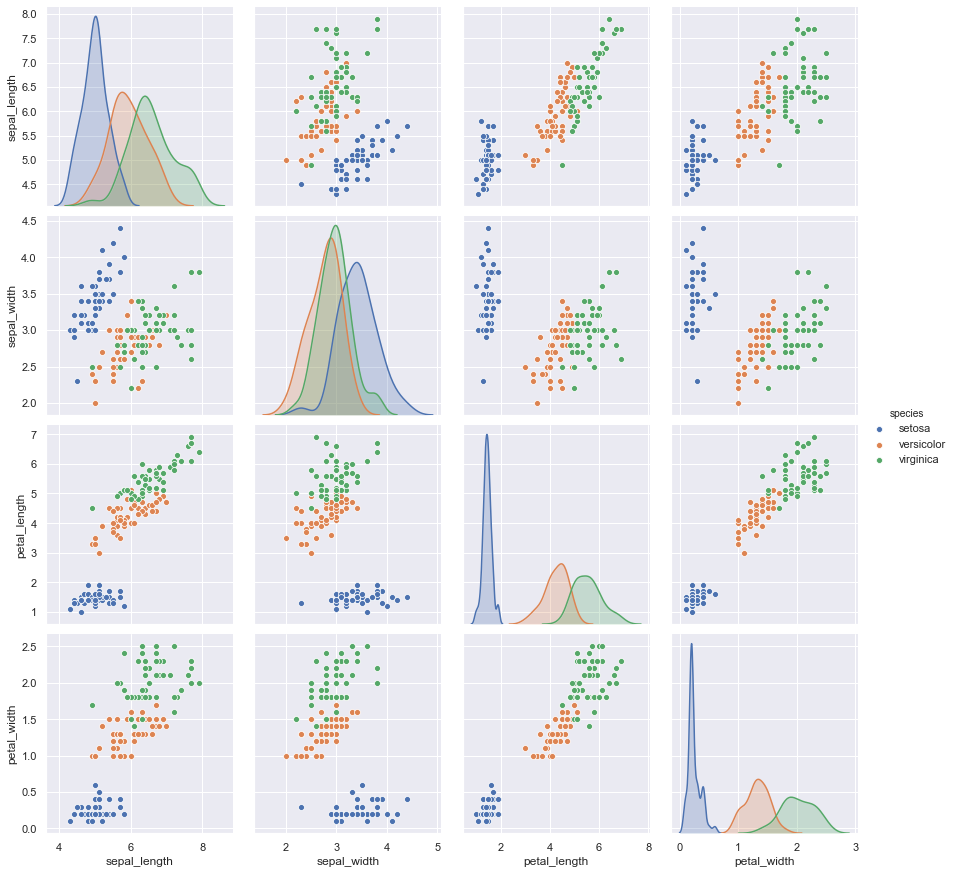

In [54]:
sns.pairplot(data=iris, hue='species', height=3, aspect=1);

Antes de entrenar los distintos clasificadores, dividimos el data set en training y test sets.

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris.drop(['species'], axis=1),
                                                    iris['species'],
                                                    test_size=0.3,
                                                    random_state=42)

In [53]:
print('Número de observaciones en el set de training:', len(X_train))
print('Número de observaciones en el set de test:', len(X_test))

Número de observaciones en el set de training: 105
Número de observaciones en el set de test: 45


### Arboles de decisión

Los árboles de decisión son una clase de algoritmos usados para clasificación y regresión. Los modelos basados en arboles generan una estructura en la que en cada nivel se dividen los datos basados en algúna característica de un atributo (ej. `petal_length` > 1.5 cm).  
En Scikit-learn los arboles de decisión se encuentran en el modulo `sklearn.tree`.

In [81]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

modelo_dt = DecisionTreeClassifier(max_depth=2)
modelo_dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
export_graphviz(modelo_dt,
                'img/arbol.dot',
                feature_names=iris.columns[:-1],
                class_names=iris['species'].cat.categories,
                rounded=True,
                filled=True)

!dot -Tpng img/arbol.dot -o img/arbol.png

![Arbol de decisión](img/arbol.png)

Lo evaluamos sobre el test set. En el caso de los árboles de decisión, Scikit usa la [exactitud](https://es.wikipedia.org/wiki/Precisión_y_exactitud) (accuracy en inglés) como medida de scoring.

![Pecision, recall and accuracy](img/precision_recall_accuracy.png)

In [83]:
modelo_dt.score(X_test, Y_test)

1.0

Los árboles de decisión tienen el beneficio de ser fácilmente interpretables y (relativamente) sencillos de entrenar. Uno de los problemas que presentan es que tienen una tendencia al _overfitting_, es decir, el modelo se sobre adapta a los datos de entrenamiento y no generaliza bien en la práctica.

#### Random forests

Para sobreponerse a este problema, en los 90 surgió la idea de combinar varios árboles de decisión en un método conocido como [Random forests](https://en.wikipedia.org/wiki/Random_forest). La idea es entrenar múltiples arboles en un subconjunto de los datos y usando sólo algunos atributos en cada árbol. Para hacer una predicción se suele tomar la moda (la predicción mas frecuente) de las distintas predicciones de los árboles individuales.

In [86]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=20, n_jobs=-1)
modelo_rf.fit(X_train, Y_train)

modelo_rf.score(X_test, Y_test)

1.0

También podemos ver que _features_ (atributos) resultan mas importantes para este clasificador.

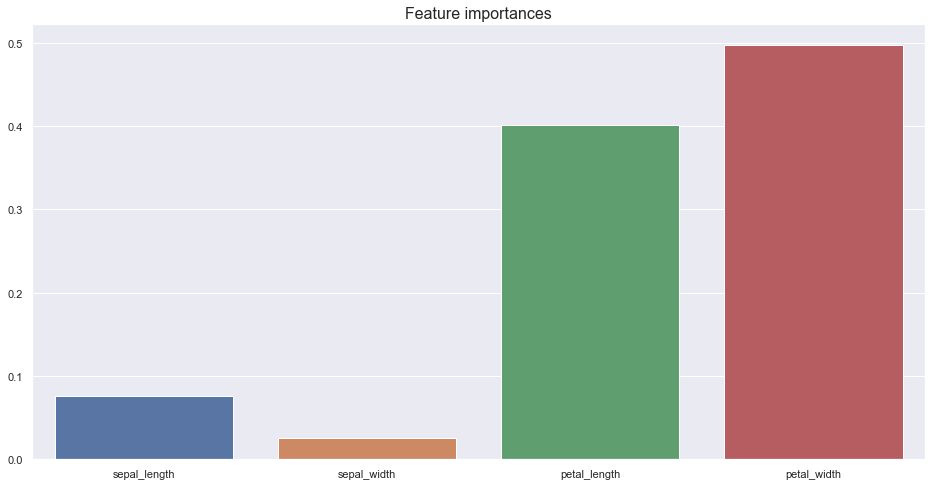

In [92]:
ax = sns.barplot(x=iris.columns[:-1], y=modelo_rf.feature_importances_)
ax.set_title('Feature importances', fontsize=16);

### Support Vector Machines

Las [máquinas de vectores soporte](https://es.wikipedia.org/wiki/Máquinas_de_vectores_de_soporte) son una clase de algoritmos muy usados en tareas de clasificación de datasets pequeños y medianos. La idea de estos algoritmos es crear [hiperplanos](https://es.wikipedia.org/wiki/Hiperplano) que separen las distintas clases con la mayor distancia posible.

#### Preprocesamiento

Muchos métodos de machine learning (SVMs y redes neuronales, por ejemplo) son sensibles a la escala de los datos. Por eso, una práctica común es transformar los atributos para que estos métodos produzcan resultados coherentes.

Scikit tiene distintos tipos de scalers en el modulo `sklearn.preprocessing`. El que vamos a usar a continuación ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) realiza la siguiente transformación:

$$ z = (x - \mu)/ \sigma $$

Donde $\mu$ es la media y $\sigma$ la desviación estandar de los valores del atributo.

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled_features = scaler.fit_transform(iris.drop(['species'], axis=1))

X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(iris_scaled_features,
                                                                                iris['species'],
                                                                                test_size=0.3,
                                                                                random_state=42)

#### Linear Support Vector Classification

Si los datos a analizar son [linealmente separables](https://en.wikipedia.org/wiki/Linear_separability) podemos usar un modelo `LinearSVC` del módulo `sklearn.svm`.

In [126]:
from sklearn.svm import LinearSVC

modelo_svc = LinearSVC()
modelo_svc.fit(X_train_scaled, Y_train_scaled)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [127]:
modelo_svc.score(X_test_scaled, Y_test_scaled)

0.9555555555555556

#### Kernelized Support Vector Machines

Son una extensión a los SVMs lineales que permiten modelos más complejos que tienen en cuenta features no lineales (polinomios de los atributos del training set o interacciones entre los atributos).

In [130]:
from sklearn.svm import SVC

modelo_svm = SVC()
modelo_svm.fit(X_train_scaled, Y_train_scaled)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
modelo_svm.score(X_test_scaled, Y_test_scaled)

1.0

### k-Nearest Neighbors (KNN)

Es un método usado tanto para clasificación como para regresión que sencillamente guarda los datos de entrenamiento, y para predecir utiliza la clase (en el caso de una clasificación) mayoritaria de los $k$ puntos más cercanos.

In [133]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train_scaled, Y_train_scaled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [134]:
modelo_knn.score(X_test_scaled, Y_test_scaled)

1.0

Este modelo funciona bien en la práctica siempre y cuando nuestros datos tengan pocas features. En cuanto aumenta el número de atributos, ocurre lo que se denomina la [maldición de la dimensión](https://es.wikipedia.org/wiki/Maldición_de_la_dimensión). En otras palabras, los $k$ puntos mas cercanos al valor de input pueden ser muy distantes en un espacio de $p$-dimensional (siendo $p$ el número de features), dando lugar a una predicción muy pobre.